Here are some recommended packages, not all are required and depends on your solution.

In [110]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

## Questions

You are a consultant for a company that sells widgets.  They have historical data on their sales on their investments in advertising in various media outlets, including TV, radio, and newspapers.  On the basis of this data, how should they be spending their advertising money in the future?

Your analysis should answer the following questions:

Is there a relationship between ads and sales?

How strong is that relationship?

Which ad types contribute to sales?

What is the effect of each ad type of sales?

Given ad spending in a particular market, can sales be predicted?

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


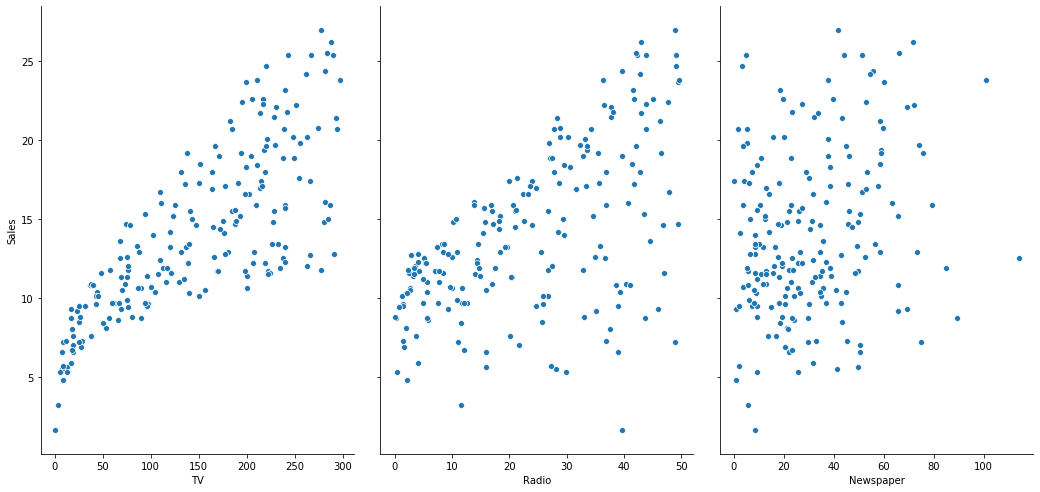

In [149]:
# read data into a DataFrame, this is money spent on different medias
data = pd.read_csv('https://raw.githubusercontent.com/lneisenman/isl/master/data/Advertising.csv', index_col=0)
print(data.head())
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7)


In the lecture, we covered how to perform a linear regression model.  We did not however explore how "good" this model is.  The task below will have you identifying ways to evaluate a linear regression model.

Machine learning focuses on what the model predicts. If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the Statsmodels Python package. Take some time to look at this [package](https://www.statsmodels.org/stable/regression.html) and also an [example of evaluating a linear regression](https://www.statsmodels.org/stable/examples/notebooks/generated/gls.html).

Similar to Scikit-learn, one can calculate the intercept and coefficient for a linear fit for a set of data.  

In [154]:
TV_model = smf.ols(formula='Sales ~ TV', data=data).fit()
print(TV_model.params)
TV_model.summary()

Intercept    7.032594
TV           0.047537
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.47e-42
Time:                        12:45:04   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
Radio_model = smf.ols(formula='Sales ~ Radio', data=data).fit()
print(Radio_model.params)
Radio_model.summary()

Intercept    9.311638
Radio        0.202496
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           4.35e-19
Time:                        11:15:29   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
Newspaper_model = smf.ols(formula='Sales ~ Newspaper', data=data).fit()
print(Newspaper_model.params)
Newspaper_model.summary()

Intercept    12.351407
Newspaper     0.054693
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 03 Oct 2019   Prob (F-statistic):            0.00115
Time:                        11:15:24   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
topmodel = smf.ols(formula='Sales ~ TV+Radio+Newspaper', data=data).fit()

A confidence interval can be used to describe a linear model.  How would you calculate the confidence interval of this model and what does this confidence interval mean?

In [53]:
TV_model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [65]:
Newspaper_model.conf_int()

,0,1
Intercept,11.125956,13.576859
Newspaper,0.022005,0.087381


In [66]:
Radio_model.conf_int()

,0,1
Intercept,8.201588,10.421688
Radio,0.162244,0.242747


In [158]:
topmodel.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
Radio,0.171547,0.205513
Newspaper,-0.012616,0.010541


The confidence interval is a range of values for each parameter. A 95% confidence interval says that 95% of the time, the true mean will lie within the specified interval. This also means that the 5% of the time, the true mean will not be included in the interval given. A lower confidence interval will have a tighter range, and a higher confidence interval will have a looser range, so that it can make sure to capture the true mean a higher percentage of the time. If you only want to capture the true mean, let’s say, 1 out of every 2 times, this is a 50% confidence interval, so the range can be pretty tight because you only need to capture the true mean 50% of the time. The default alpha level is .05, which means a 95% confidence interval. This means that the results show above are a 95% confidence interval. The model is set up with a slope parameter, and an intercept. This is because this is a linear fit, so the two parameters you need to define a line are a slope and an intercept. This is why there are two confidence intervals shown for each model. 

Other metrics that are used to describe the appropriateness of a model is a p-value.  How would you calculate the p-value and r-squared values of the model?  What do these values mean?

In [75]:
print(Newspaper_model.pvalues)
print(Newspaper_model.rsquared)


Intercept    4.713507e-49
Newspaper    1.148196e-03
dtype: float64
0.05212044544430516


In [153]:
print(TV_model.pvalues)
print(TV_model.rsquared)

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64
0.8972106381789522


In [79]:
print(Radio_model.pvalues)
print(Radio_model.rsquared)

Intercept    3.561071e-39
Radio        4.354966e-19
dtype: float64
0.33203245544529525


In [159]:
print(topmodel.pvalues)
print(topmodel.rsquared)

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64
0.8972106381789522


The p-value is a metric that tells you if your independent variable is a significant predictor of your dependent variable. A high p-value means that the x variable IS NOT a significant predictor of the y variable. A low p-value means that the x variable IS a significant predictor of the y variable. In this case, the most important metric to look at is the linear regression model that includes all of the independent variables. The independent variables are TV, Newspaper, and Radio. The dependent variable is sales. We would like to know which of these x variables are a significant predictor of sales. So, looking at the p-values, we see that the p-value for Newspaper is .8599, which is much bigger than .05, so we can conclude that Newspaper advertisement IS NOT a significant predictor of sales. The other two p-values are very small, which means that those two independent variables ARE significant predictors of sales. 

R-squared is a metric that tells you how much of the variation seen in the dependent variable is explained by the independent variable. In other words, how much of the observed variation in y can be explained by x? An R squared value of 1 means that 100% of the variation seen in y can be explained by x. An R2 value of 0 means that none of the variation seen on y can be explained by x. Looking at the graphs, the more clustered the data, the higher the r-squared value we would expect to see. The newspaper plot has a lot of variation, which is why it has a low r-squared value. The TV plot is clustered and somewhat linear, so a lot of the variation in y can be explained by x. This is why the r-squared value is high, at 0.89.


# Homework - Linear Regression with Personal Dataset

In this analysis, I use a linear regression model with my own data. The dataset I am using is from a machine and it is chassis roll data and r2 data from a sprayer boom. The r2 sensor measure the distance the boom is from the ground. The chassis roll data is the angle at which the chassis is rolled to at a particular time. I first had to write a matlab script to transform my data from two signals that were collected at different rates into one set of data that had a downsampled time array and the two signals on that timeseries. 

During this anlaysis, I would like to investigate the connection between chassis roll and r2 position. As the machine rolls, I would expect the boom to follow a similar behavior and roll with the chassis. I would like to answer the question: Can I use chassis roll to effectively predict r2 position? This would be helpful to my reaseach becasue if we could anticipate where the boom is GOING to be at a particualr instance in time based off of measuring chassis roll, then we could apply corrections to the position of the boom earlier. Then, our boom control would be faster and latency would be reduced, and it could have a significat effect on performance. 

Text(0, 0.5, 'R2 Position (mm)')

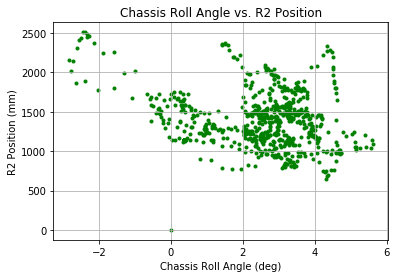

In [136]:
import matplotlib.pyplot as plt

data = pd.read_excel('LinRegHW.xlsx')
data.head()
plt.scatter(data['rollang'],data['r2'], marker='.',color='g')
plt.grid()
plt.title('Chassis Roll Angle vs. R2 Position')
plt.xlabel('Chassis Roll Angle (deg)')
plt.ylabel('R2 Position (mm)')

In [126]:
x = data['rollang']
y = data['r2']

In [119]:
X = x[:,np.newaxis]
X.shape

(715, 1)

In [120]:
Y = data['r2']
Y.shape

(715,)

In [121]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
xfit = np.linspace(-3,6)

In [130]:
Xfit = xfit[:, np.newaxis]

In [131]:
yfit = model.predict(Xfit)

1513.501370340015
[-51.22017041]


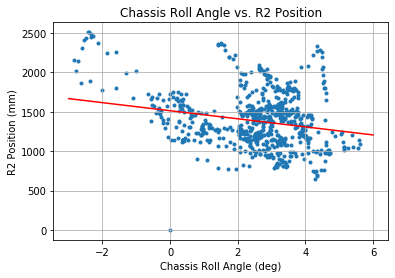

In [142]:
plt.scatter(x,y, marker='.')
plt.plot(xfit,yfit,color='r')
plt.grid()
plt.title('Chassis Roll Angle vs. R2 Position')
plt.xlabel('Chassis Roll Angle (deg)')
plt.ylabel('R2 Position (mm)')
print(model.intercept_)
print(model.coef_)

In [138]:
import statsmodels.formula.api as smf

rollang_model = smf.ols(formula='r2 ~ rollang', data=data).fit()
print(rollang_model.params)
rollang_model.summary()


Intercept    1513.50137
rollang       -51.22017
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     r2   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     37.95
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           1.21e-09
Time:                        20:46:49   Log-Likelihood:                -5186.4
No. Observations:                 715   AIC:                         1.038e+04
Df Residuals:                     713   BIC:                         1.039e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1513.5014     23.659     63.971      0.000    1467.051    1559.952
rollang      -51.2202      8.314     -6.161      0.000     -67.543     -34.897
==============================================================================
Omnibus:                       38.362   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.846
Skew:                           0.554   Prob(JB):                     3.01e-10
Kurtosis:                       3.493   Cond. No.                         5.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
print(rollang_model.rsquared)
print(rollang_model.pvalues)

0.050541588372929436
Intercept    1.273028e-297
rollang       1.210175e-09
dtype: float64


# Conclusion

In conclusion, the r-squared value tell us that the variation in r2 sensor position cannot be explained by chassis roll. The results show that only 5 percent of the variation in r2 sensor positon is explained by chassis roll. This is not the answer I would expect, but this must mean that the boom becomes significantly decoupled from the chassis during field operation. The p-value in this model is not really something to look at, because there is only one independent variable included in this model. Overall, this study showed that factors other than chassis roll are present when operating in the field. In the future, I would do this study again, but include more independent variables that may affect r2 boom position. Then, I would hopefully be able to see which variables are significantly affecting boom position.  